# Week 3 - IT Class Solutions - Finite Difference Method

## Question 1

Use the general $derivative(f, a, method, h)$ function from the finite difference tutorial to compute and plot the derivative of the function using the central difference approximation:

$$f(x) = 7{x^3} - 5x + 1,\,\,x \in [ - 5,5]$$

Compare this approximation by plotting it alongside the exact analytical derivative solution. 

## Answer

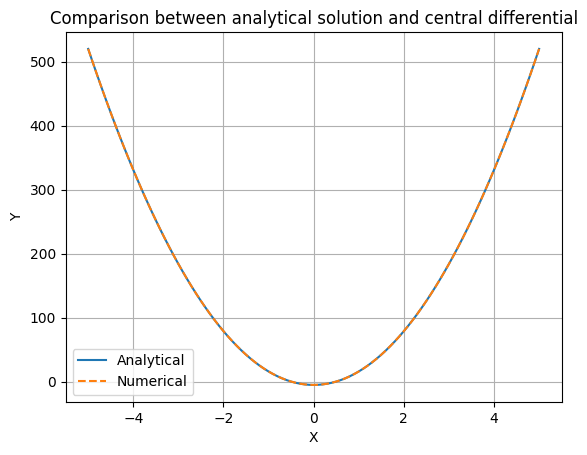

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def derivative(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

f=lambda x:7*x**3-5*x+1
f_p=lambda x: 21*x**2-5

x=np.linspace(-5,5,101)
df=derivative(f,x)
plt.plot(x,f_p(x),label='Analytical')
plt.plot(x,df,'--',label='Numerical')
plt.title('Comparison between analytical solution and central differential')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower left')
plt.grid()
plt.show()






## Question 2 

Write a function $myNumDiff(f, a, b, n, option)$ with the output as $[df, X]$, where $f$ is a function object. The function $myNumDiff$ should compute the derivative of $f$ numerically for $n$ evenly spaced points starting at $a$ and ending at $b$, according to the method defined by $option$. The input argument $option$ is one of the following strings: $"forward", "backward"$ and $"central"$.

Note that for the forward and backward method, the output argument $dy$ should be a 1D array of length $n-1$ and for the central difference method $dy$, it should be a 1D array of length $n-2$. The function should also output a vector $X$ that is the same size as $dy$ and denotes the x-values for which $dy$ is valid. 

### Test cases:

#### Input Code:

x = np.linspace(0, 2*np.pi, 100)

f = lambda x: np.sin(x)

[dyf, Xf] = myNumDiff(f, 0, 2*np.pi, 10, 'forward')

[dyb, Xb] = myNumDiff(f, 0, 2*np.pi, 10, 'backward')

[dyc, Xc] = myNumDiff(f, 0, 2*np.pi, 10, 'central')

plt.figure(figsize = (12, 8))

plt.plot(x, np.cos(x), label = 'analytic')

plt.plot(Xf, dyf, label = 'forward')

plt.plot(Xb, dyb, label = 'backward')

plt.plot(Xc, dyc, label = 'central')

plt.legend()

plt.title('Analytic and Numerical Derivatives of Sine')

plt.xlabel('x')

plt.ylabel('y')

plt.show()


#### Output Plot: 


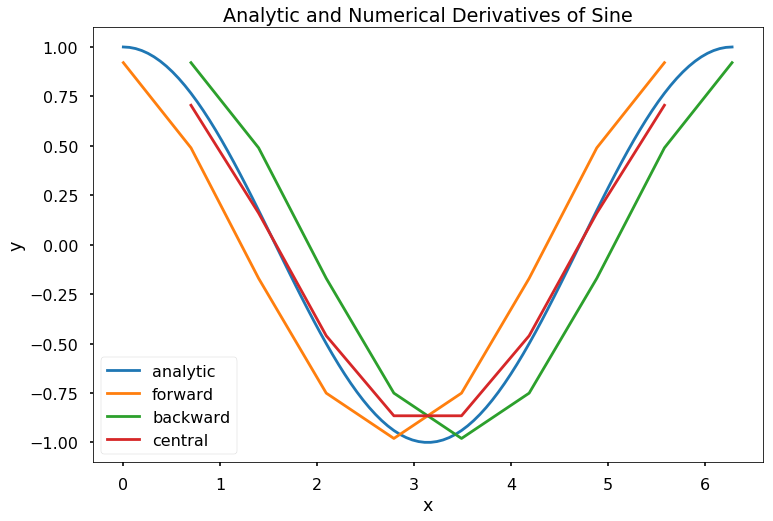

#### Input Code:

x = np.linspace(0, np.pi, 1000)

f = lambda x: np.sin(np.exp(x))

[dy10, X10] = myNumDiff(f, 0, np.pi, 10, 'central')

[dy20, X20] = myNumDiff(f, 0, np.pi, 20, 'central')

[dy100, X100] = myNumDiff(f, 0, np.pi, 100, 'central')

plt.figure(figsize = (12, 8))

plt.plot(x, np.exp(x)*np.cos(np.exp(x)), label = 'analytic')

plt.plot(X10, dy10, label = '10 points')

plt.plot(X20, dy20, label = '20 points')

plt.plot(X100, dy100, label = '100 points')

plt.legend()

plt.title('Analytic and Numerical Derivatives of Sine')

plt.xlabel('x')

plt.ylabel('y')

plt.show()

#### Output Plot: 


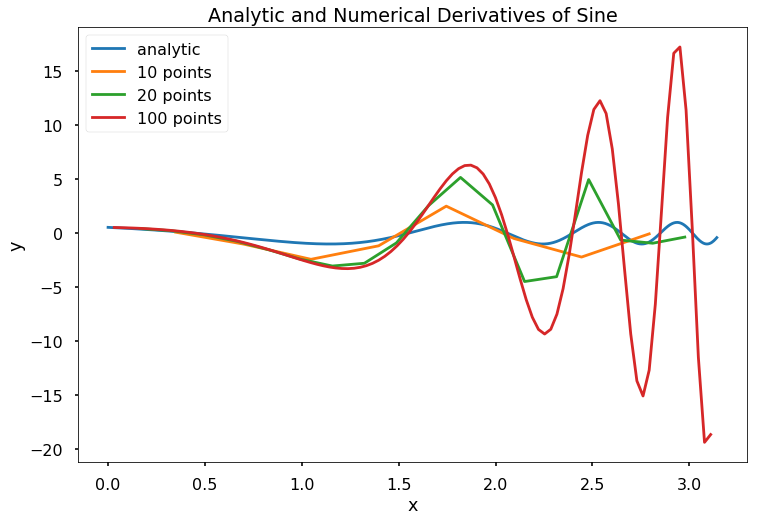

## Answer

In [2]:
## Your Code## 

def myNumDiff(f, a, b, n, option):
  '''Compute the difference formula for f'(x) within [a,b] with total n points.

  Parameters
  ----------
  f : function
      Vectorized function of one variable
  a : number
      Begin point of the interval[a,b]
  b : number
      End point of the interval[a,b]
  n : number
      Total number of points to be differentiated
  option : string
      Difference formula: 'forward', 'backward' or 'central'

  Returns
  -------
  list [dy,X]
  dy : list of differential f'(x) between a and b
  X : list of x where y is valid
      Difference formula:
          central: f(a+h) - f(a-h))/2h
          forward: f(a+h) - f(a))/h
          backward: f(a) - f(a-h))/h            
  '''
  # step size
  h = (b-a)/n

  # initialize dy and X arrays
  dy = []
  X = []

  # compute derivative using the chosen method
  if option == "forward":
    for i in range(n):
      x = a + i*h
      dy.append((f(x+h) - f(x))/h)
      X.append(x)
  elif option == "backward":
    for i in range(n):
      x = a + (i+1)*h
      dy.append((f(x) - f(x-h))/h)
      X.append(x)
  elif option == "central":
    for i in range(1, n):
      x = a + i*h
      dy.append((f(x+h) - f(x-h))/(2*h))
      X.append(x)
  else:
    raise ValueError("Invalid option. Choose from 'forward', 'backward', and 'central'.")

  return [dy, X]


Now we test the function using given test code

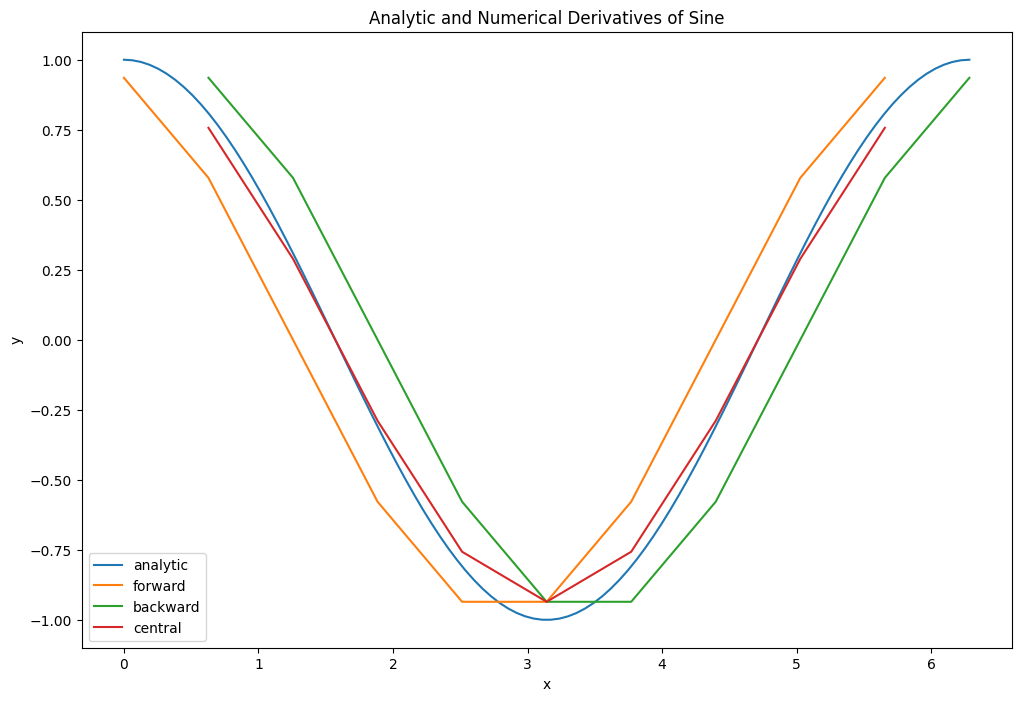

In [3]:
#### Input Code:

x = np.linspace(0, 2*np.pi, 100)

f = lambda x: np.sin(x)

[dyf, Xf] = myNumDiff(f, 0, 2*np.pi, 10, 'forward')

[dyb, Xb] = myNumDiff(f, 0, 2*np.pi, 10, 'backward')

[dyc, Xc] = myNumDiff(f, 0, 2*np.pi, 10, 'central')

plt.figure(figsize = (12, 8))

plt.plot(x, np.cos(x), label = 'analytic')

plt.plot(Xf, dyf, label = 'forward')

plt.plot(Xb, dyb, label = 'backward')

plt.plot(Xc, dyc, label = 'central')

plt.legend()

plt.title('Analytic and Numerical Derivatives of Sine')

plt.xlabel('x')

plt.ylabel('y')

plt.show()


#### Output Plot: 

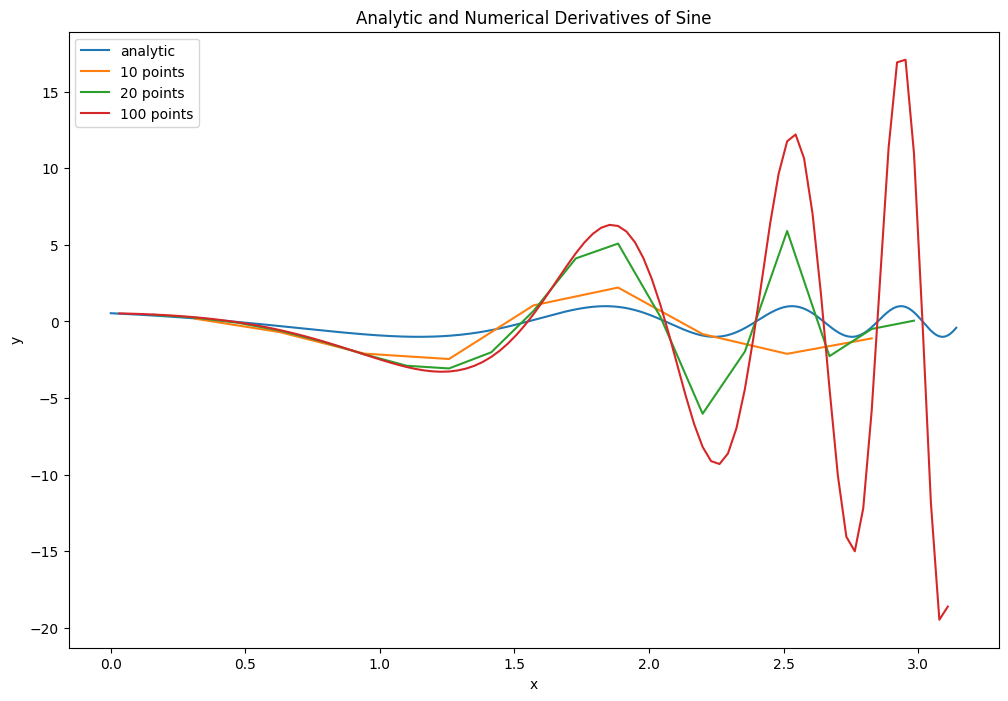

In [4]:
#### Input Code:

x = np.linspace(0, np.pi, 1000)

f = lambda x: np.sin(np.exp(x))

[dy10, X10] = myNumDiff(f, 0, np.pi, 10, 'central')

[dy20, X20] = myNumDiff(f, 0, np.pi, 20, 'central')

[dy100, X100] = myNumDiff(f, 0, np.pi, 100, 'central')

plt.figure(figsize = (12, 8))

plt.plot(x, np.exp(x)*np.cos(np.exp(x)), label = 'analytic')

plt.plot(X10, dy10, label = '10 points')

plt.plot(X20, dy20, label = '20 points')

plt.plot(X100, dy100, label = '100 points')

plt.legend()

plt.title('Analytic and Numerical Derivatives of Sine')

plt.xlabel('x')

plt.ylabel('y')

plt.show()

#### Output Plot: 